Decision Tree & Virus Dataset

After reading the file path of the Virus dataset, I cleaned the rows with missing features and obtained 1622 rows of data. 
I calculated the basic statistical properties of each feature and displayed the frequency distributions of the features 
in a graph. Then, I defined the decision tree model. By setting 80% of the dataset for training and 20% for testing, 
I performed the necessary training and prediction processes. By determining the most suitable max_depth value as 10, 
I achieved an accuracy of 84%. I displayed the results in a graph. I created a graph comparing the prediction results 
with the actual values for the first 10 values of the dataset.

Elif Dilasa Kurt

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [92]:

df = pd.read_csv("dataset.csv")
# Veri setindeki eksik değerleri kontrol et
print(df.isnull().sum())
# Satır sayısını al
satir_sayisi = len(df)

print("Toplam satır sayısı:", satir_sayisi)

df.dropna(inplace=True)  

# Satır sayısını al
satir_sayisi = len(df)

print("Toplam satır sayısı:", satir_sayisi)


feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64
Toplam satır sayısı: 1999
Toplam satır sayısı: 1622


   feature_1  feature_2  feature_3  feature_4  isVirus
0  -0.233467   0.308799   2.484015   1.732721    False
1   1.519003   1.238482   3.344450   0.783744    False
2   0.400640   1.916748   3.291096  -0.918519    False
3  -1.616474   0.209703   1.461544  -0.291837    False
4   1.480515   5.299829   2.640670   1.867559     True
         feature_1    feature_2    feature_3    feature_4
count  1622.000000  1622.000000  1622.000000  1622.000000
mean      0.817927     1.791153     2.601636     0.800769
std       1.734378     1.596215     1.460810     1.766757
min      -2.285499    -7.363119    -5.363119    -3.006499
25%      -0.556075     0.993928     1.664548    -0.558805
50%       0.056180     1.872436     2.476839     0.008607
75%       2.273541     2.837020     3.480942     2.283102
max       5.929096     7.549658     9.260337     5.759355


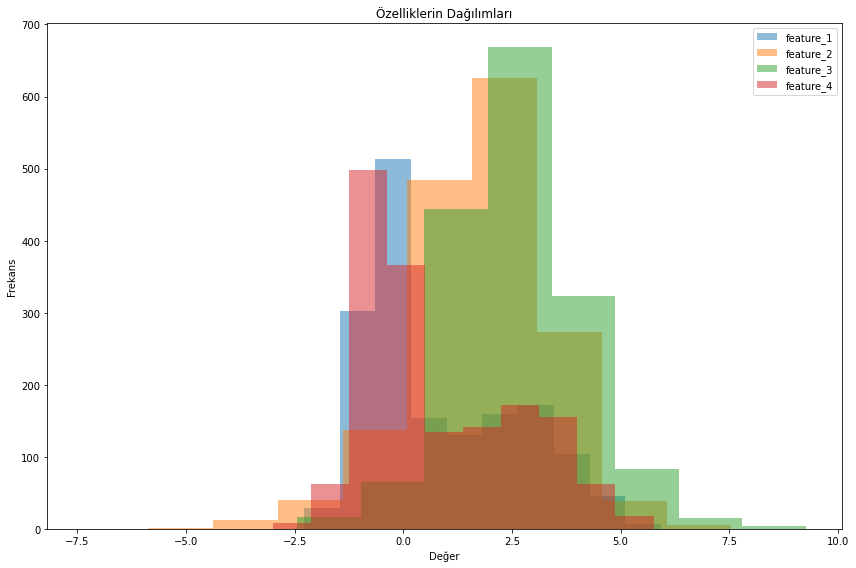

In [93]:

# İlk beş gözlemi görüntüle
print(df.head())

# Veri setinin temel istatistiklerini görüntüle
print(df.describe())


# Özelliklerin dağılımlarını görselleştir
plt.figure(figsize=(12, 8))
for column in df.columns[:-1]:  # Hedef değişkeni dışarıda bırak
    plt.hist(df[column], alpha=0.5, label=column)

plt.title('Özelliklerin Dağılımları')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.legend()
plt.tight_layout()
plt.show()

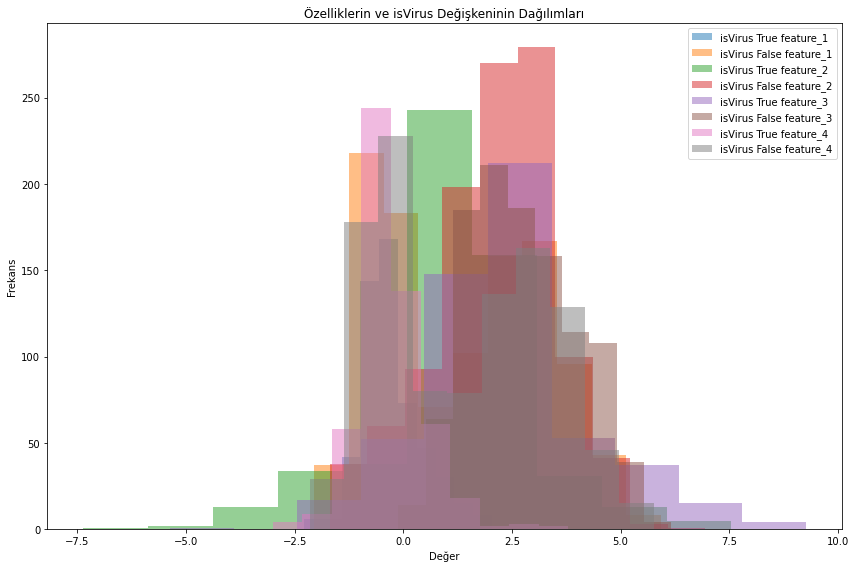

In [94]:
# Özelliklerin ve hedef değişkenin dağılımlarını görselleştir
plt.figure(figsize=(12, 8))
for column in df.columns[:-1]:  # Hedef değişkeni dışarıda bırak
    plt.hist(df[df['isVirus'] == True][column], alpha=0.5, label='isVirus True ' + column)
    plt.hist(df[df['isVirus'] == False][column], alpha=0.5, label='isVirus False ' + column)

plt.title('Özelliklerin ve isVirus Değişkeninin Dağılımları')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
import numpy as np

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Split edilecek özellik
        self.threshold = threshold          # Bölme eşiği
        self.left = left                    # Sol alt düğüm
        self.right = right                  # Sağ alt düğüm
        self.value = value                  # Yaprak düğümünde sınıf etiketi

class CustomDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth          # Ağacın maksimum derinliği
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Durdurma koşulları
        if (depth == self.max_depth) or (n_labels == 1) or (n_samples < 2):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # En iyi özellik ve eşiği bul
        best_feature, best_threshold = self._find_best_split(X, y)

        # Daha iyi bir bölünme bulunamadıysa yaprak düğüm oluştur
        if best_feature is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # Veriyi böl
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature_index=best_feature, threshold=best_threshold,
                    left=left_subtree, right=right_subtree)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        # Her özellik ve eşik için Gini impurity hesapla
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices
                gini = self._calculate_gini(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_gini(self, left_labels, right_labels):
        p_left = len(left_labels) / (len(left_labels) + len(right_labels))
        p_right = len(right_labels) / (len(left_labels) + len(right_labels))
        gini_left = 1 - sum([(np.sum(left_labels == c) / len(left_labels)) ** 2 for c in np.unique(left_labels)])
        gini_right = 1 - sum([(np.sum(right_labels == c) / len(right_labels)) ** 2 for c in np.unique(right_labels)])
        gini = (p_left * gini_left) + (p_right * gini_right)
        return gini

    def _most_common_label(self, y):
        counts = np.bincount(y)
        if len(counts) > 0:
            return np.argmax(counts)
        else:
            # Boş dizi durumunda varsayılan bir değer döndür
            return -1


    def predict(self, X):
        predictions = [self._predict_single(x, self.tree) for x in X]
        return np.array(predictions)

    def _predict_single(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] < node.threshold:
            return self._predict_single(x, node.left)
        else:
            return self._predict_single(x, node.right)

# Modeli oluştur ve eğit
X = df[['feature_1', 'feature_2', 'feature_3', 'feature_4']]
y = df['isVirus']

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerini NumPy dizilerine dönüştür
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


model = CustomDecisionTree(max_depth=10)
model.fit(X_train, y_train)

# Eğitim verileri üzerinde tahmin yap
train_predictions = model.predict(X_train)

# Test verileri üzerinde tahmin yap
test_predictions = model.predict(X_test)

# Eğitim ve test setleri için doğruluk değerlerini hesapla
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Eğitim seti doğruluk:", train_accuracy)
print("Test seti doğruluk:", test_accuracy)




Eğitim seti doğruluk: 0.936006168080185
Test seti doğruluk: 0.84


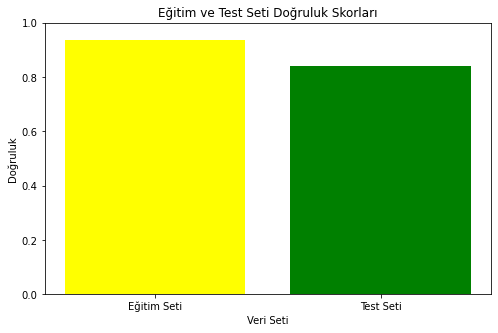

In [96]:
plt.figure(figsize=(8, 5))
plt.bar(["Eğitim Seti", "Test Seti"], [train_accuracy, test_accuracy], color=['yellow', 'green'])
plt.title('Eğitim ve Test Seti Doğruluk Skorları')
plt.xlabel('Veri Seti')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

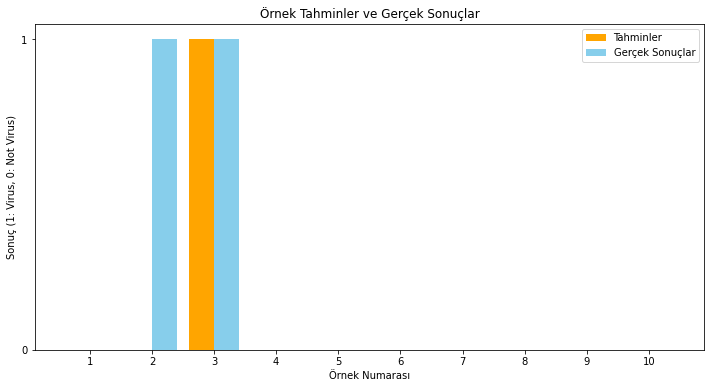

In [98]:
# Gerçek sonuçları alalım
true_labels = y_test[:10]

# Örnek tahminler yapalım
example_predictions = model.predict(X_test[:10])

# Örnek tahminlerin sonuçlarını ve gerçek sonuçları görselleştirelim
plt.figure(figsize=(12, 6))

plt.bar(np.arange(10)-0.2, example_predictions, width=0.4, color='orange', label='Tahminler')
plt.bar(np.arange(10)+0.2, true_labels, width=0.4, color='skyblue', label='Gerçek Sonuçlar')

plt.title('Örnek Tahminler ve Gerçek Sonuçlar')
plt.xlabel('Örnek Numarası')
plt.ylabel('Sonuç (1: Virus, 0: Not Virus)')
plt.xticks(np.arange(10), np.arange(1, 11))
plt.yticks([0, 1])
plt.legend()
plt.show()
